In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [2]:
sns.set_theme(style="whitegrid")

In [4]:
radi_arr = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
# simulation runs for each radius
n_ins = 10
# steps
n_step = 100
# number of radius
n_radi = 8

ot_err = np.zeros((n_radi, n_ins, n_step))
cot_err = np.zeros((n_radi, n_ins, n_step))
KL_err = np.zeros((n_radi, n_ins, n_step))
EM_err = np.zeros((n_radi, n_ins, n_step))

for r_idx in range(n_radi):
    radius = radi_arr[r_idx]
    cot_dir = "./logs/BCOT_track_radi_{}".format(radius)
    ot_dir = "./logs/OT_track_radi_{}".format(radius)
    KL_dir = "./logs/KL_track_radi_{}".format(radius)
    
    with open('{}/obs.pickle'.format(cot_dir), 'rb') as fp:
        obs = pickle.load(fp)

    with open('{}/unobs_state.pickle'.format(cot_dir), 'rb') as fp:
        unobs = pickle.load(fp)

    with open('{}/est_state.pickle'.format(cot_dir), 'rb') as fp:
        cot_est = pickle.load(fp)

    with open('{}/EM_est.pickle'.format(cot_dir), 'rb') as fp:
        EM_est = pickle.load(fp)


    with open('{}/obs.pickle'.format(ot_dir), 'rb') as fp:
        ot_obs = pickle.load(fp)

    with open('{}/unobs_state.pickle'.format(ot_dir), 'rb') as fp:
        ot_unobs = pickle.load(fp)

    with open('{}/est_state.pickle'.format(ot_dir), 'rb') as fp:
        ot_est = pickle.load(fp)

    with open('{}/EM_est.pickle'.format(ot_dir), 'rb') as fp:
        ot_EM_est = pickle.load(fp)

        
    with open('{}/obs.pickle'.format(KL_dir), 'rb') as fp:
        KL_obs = pickle.load(fp)

    with open('{}/unobs_state.pickle'.format(KL_dir), 'rb') as fp:
        KL_unobs = pickle.load(fp)

    with open('{}/est_state.pickle'.format(KL_dir), 'rb') as fp:
        KL_est = pickle.load(fp)

    with open('{}/EM_est.pickle'.format(KL_dir), 'rb') as fp:
        KL_EM_est = pickle.load(fp)
    

    obs = np.array(obs)
    unobs = np.array(unobs)
    EM_est = np.array(EM_est)
    cot_est = np.array(cot_est)

    ot_obs = np.array(ot_obs)
    ot_unobs = np.array(ot_unobs)
    ot_EM_est = np.array(ot_EM_est)
    ot_est = np.array(ot_est)
    
    KL_obs = np.array(KL_obs)
    KL_unobs = np.array(KL_unobs)
    KL_EM_est = np.array(KL_EM_est)
    KL_est = np.array(KL_est)

    # ot_obs, ot_unobs are the same as these of COT
    cot_err[r_idx, :, :] = np.sqrt(np.sum((cot_est[:, :, :] - unobs[:, :, :])**2, axis=2))
    ot_err[r_idx, :, :] = np.sqrt(np.sum((ot_est[:, :, :] - ot_unobs[:, :, :])**2, axis=2))
    EM_err[r_idx, :, :] = np.sqrt(np.sum((EM_est[:, :, :] - unobs[:, :, :])**2, axis=2))
    KL_err[r_idx, :, :] = np.sqrt(np.sum((KL_est[:, :, :] - KL_unobs[:, :, :])**2, axis=2))


In [5]:
# sanity check, random seed is set. We should obtain the same samples in different algorithms
np.max(np.abs(unobs - KL_unobs))

0.0

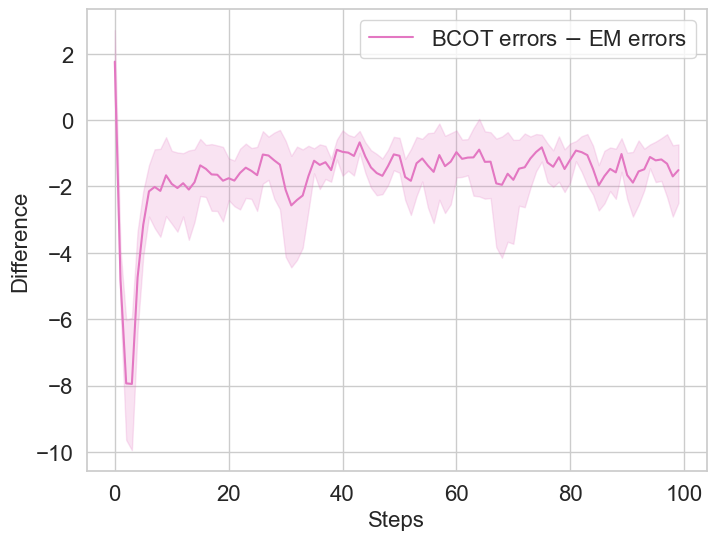

In [6]:
# First show filter has converged for vel and position resp.
err_arr = np.zeros((n_ins, n_step, 1))
# position error
# err_arr[:, :, 0] = np.mean(cot_poi_diff- KL_poi_diff, axis=0)
# velocity error
err_arr[:, :, 0] = np.mean(cot_err - EM_err, axis=0)
# err_arr[:, :, 1] = np.sqrt(np.sum((ot_EM_est[:, :, 2:] - ot_unobs[:, :, 2:])**2, axis = 2))
p_err = err_arr[:, :, :]
nsub_ins, nsub_period, nsub_act = p_err.shape
df = []
for ins in range(nsub_ins):
    for act in [0]:
        val = p_err[ins, :, act]
        df.append(pd.DataFrame({'est':val, 'instance': ins*np.ones(nsub_period), 
                                'Actions':[str(act+1),]*nsub_period, 'step': np.arange(nsub_period)}))
Qdf = pd.concat(df)
Qdf.reset_index(inplace=True)

# 
plt.figure(figsize=(8,6))
# palette = sns.color_palette("husl", 2)
g = sns.lineplot(data=Qdf, x='step', y='est', color='tab:pink', errorbar=('ci', 95)) # palette=palette[1]
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Difference', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(title='', handles = g.lines, 
           labels=[r'BCOT errors $-$ EM errors'], fontsize=16, title_fontsize=16, loc='best')
# plt.savefig('BCOT_EM.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [7]:
KLmean = np.array([-0.3132, -1.5354, -0.5032, -0.4153, -0.3616, -0.2439, -0.6004, -1.6875])
KLvar = np.array([3.5453, 15.3226,  8.0248,  3.5115,  2.6361,  2.7517,  5.17, 31.4197])

In [8]:
np.divide(KLmean, np.sqrt(KLvar))

array([-0.16633945, -0.39224309, -0.17763295, -0.22162339, -0.22271398,
       -0.14703179, -0.26405562, -0.30105286])

In [9]:
COTmean = np.array([-0.4664, -2.7545, -0.9604, -1.161,  -0.9274, -0.4745, -1.727,  -4.571])
COTvar = np.array([4.7785,  27.5135,  12.5467,   9.5549,   6.4805,   5.6263,  18.8838, 204.8375])
np.divide(COTmean, np.sqrt(COTvar))

array([-0.21335987, -0.52513366, -0.27113613, -0.37559443, -0.36430307,
       -0.20004365, -0.3974181 , -0.3193791 ])

In [10]:
OTmean = np.array([-0.3777, -2.9552, -0.8091, -0.9999, -0.8515, -0.2806, -1.657,  -4.5453])
OTvar = np.array([5.8498, 32.3483, 13.9215, 11.8039, 8.2423, 7.2835, 23.3768, 220.1552])
np.divide(OTmean, np.sqrt(OTvar))

array([-0.1561624 , -0.51959043, -0.21684988, -0.29103405, -0.29659269,
       -0.10397229, -0.34271253, -0.30633603])